In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [21]:
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)
X = tf.placeholder(tf.float32, [None, 28 * 28]) # MNIST = 28*28
Z = tf.placeholder(tf.float32, [None, 128]) # Noise Dimension = 128

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [22]:
def generator(noise_z): # 128 -> 256 -> 28*28
    G_W1 = tf.Variable(tf.random_normal([128, 256]))
    G_b1 = tf.Variable(tf.zeros([256]))
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1)
    
    G_W2 = tf.Variable(tf.random_normal([256, 28 * 28]))
    G_b2 = tf.Variable(tf.zeros([28 * 28]))
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2)
    return output, [G_W1, G_b1, G_W2, G_b2]

In [23]:
def discriminator(inputs): # 28*28 -> 256 -> 1
    D_W1 = tf.Variable(tf.random_normal([28 * 28, 128], stddev=0.01)) #확률값으로 나와야 하고, softmax는 이진분류이기 때문에 다른 것 씀 수 
    D_b1 = tf.Variable(tf.zeros([128]))
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1)
    
    D_W2 = tf.Variable(tf.random_normal([128, 1], stddev=0.01))
    D_b2 = tf.Variable(tf.zeros([1]))
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2) #sigmoid한 hypo( 확률값 )으로 나온다
    return output, [D_W1, D_b1, D_W2, D_b2]

G = generator(noise)
D(G) = discriminator(G)
D(G) => 0~1 사이의 확률값 => D가 G(fake data)를 예측한 결과

D(X) = discriminator(X)
D(X) => 0~1 사이의 확률값 => D가 X(real data)를 예측한 결과

D(G) == 1 : D가 G를 real이라고 예측했다
- G 입장 : 나이스! 오차 0으로! 
- D 입장 : 이런! 오차를 무한대로!
  
D(G) == 0 : D가 G를 fake라고 예측했다
- G 입장 : 이런! 오차를 무한대로!
- D 입장 : 나이스! 오차 0으로! 

D(X) == 1 : D가 X를 real이라고 예측했다
- D 입장 : 나이스! 오차 0으로! 

D(X) == 0 : D가 X를 fake라고 예측했다
- D 입장 : 이런! 오차를 무한대로!

In [31]:
# optimizer
tf.train.MomentumOptimizer
tf.train.AdagradOptimizer #현재로서는 아담이 제일 좋은 편. 보통 많이씀 근데 다른것도 써보자

tensorflow.python.training.adagrad.AdagradOptimizer

In [32]:
learning_rate = 0.02

G, W_G = generator(Z)

D_X, W_D = discriminator(X)
D_G, W_D = discriminator(G)

loss_D = -tf.reduce_mean(tf.log(D_X) + tf.log(1 - D_G))
loss_G = -tf.reduce_mean(tf.log(D_G))

train_D = tf.train.AdamOptimizer(learning_rate).minimize(loss_D, var_list=W_D)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(loss_G, var_list=W_G)

In [27]:
def print_fig(pred, y, sample_size):
    fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

    for i in range(sample_size):
        ax[0][i].set_axis_off()
        ax[1][i].set_axis_off()
        ax[0][i].imshow(np.reshape(pred[i], (28, 28)))
        ax[1][i].imshow(np.reshape(y[i], (28, 28)))

    plt.show()

In [28]:
epoches=100

1 epoch......finished
2 epoch......finished
3 epoch......finished
4 epoch......finished
5 epoch......finished
6 epoch......finished
7 epoch......finished
8 epoch......finished
9 epoch......finished
10 epoch......finished
11 epoch......finished
12 epoch......finished
13 epoch......finished
14 epoch......finished
15 epoch......finished
16 epoch......finished
17 epoch......finished
18 epoch......finished
19 epoch......finished
20 epoch......finished
21 epoch......finished
22 epoch......finished
23 epoch......finished
24 epoch......finished
25 epoch......finished
26 epoch......finished
27 epoch......finished
28 epoch......finished
29 epoch......finished
30 epoch......finished
31 epoch......finished
32 epoch......finished
33 epoch......finished
34 epoch......finished
35 epoch......finished
36 epoch......finished
37 epoch......finished
38 epoch......finished
39 epoch......finished
40 epoch......finished
41 epoch......finished
42 epoch......finished
43 epoch......finished
44 epoch......finish

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\matplotlib\image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\matplotlib\image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\matplotlib\image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\matplotlib\image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\matplotlib\colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\numpy\ma\core.py:713: UserWarning: Warning: converting a masked element to nan.
  data 

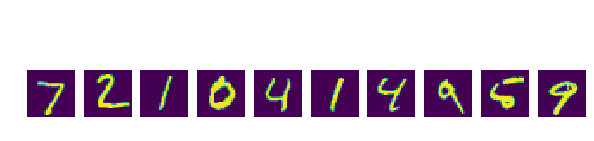

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # ********* Training and Testing
    noise_test = np.random.normal(size=(10, 128)) # 10 = Test Sample Size, 128 = Noise Dimension
    
    for epoch in range(epoches): # 200 = Num. of Epoch
        print('{} epoch'.format(epoch+1), end='')
        for i in range(int(mnist.train.num_examples / 100)): # 100 = Batch Size
            batch_xs, _ = mnist.train.next_batch(100)
            noise = np.random.normal(size=(100, 128)) #128자유롭게 주렴 

            sess.run(train_D, feed_dict={X: batch_xs, Z: noise})
            sess.run(train_G, feed_dict={Z: noise})
            if i % 100 == 0:
                print('.', end='')
        print('finished')
        
    samples = sess.run(G, feed_dict={Z: noise_test})
            
    sample_size=10
    print_fig(samples, mnist.test.images, sample_size)